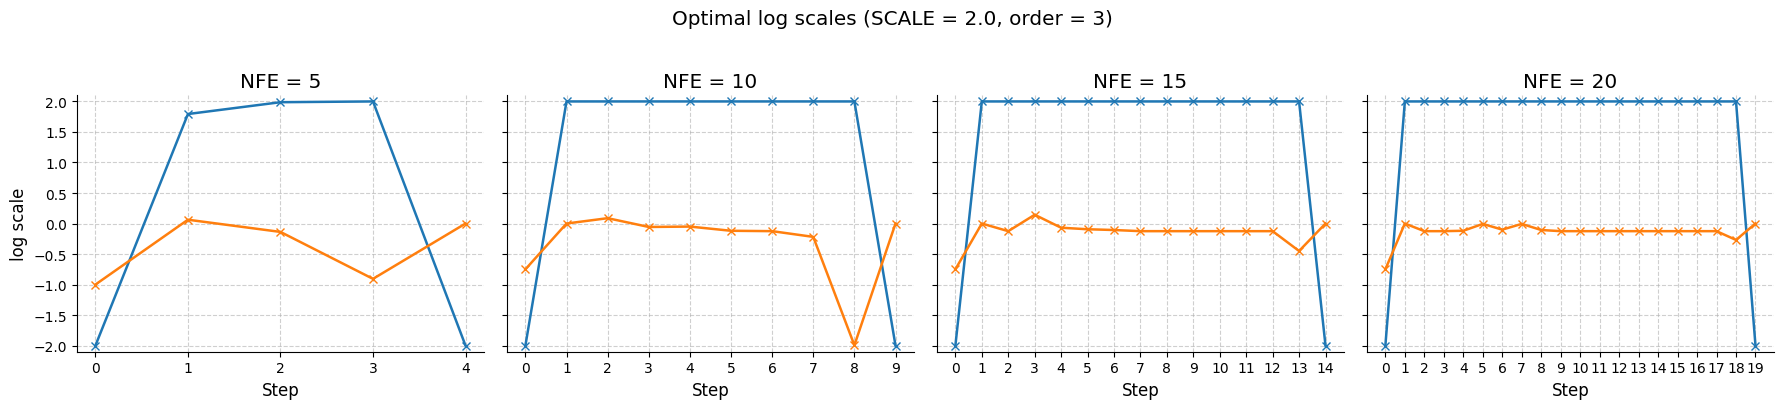

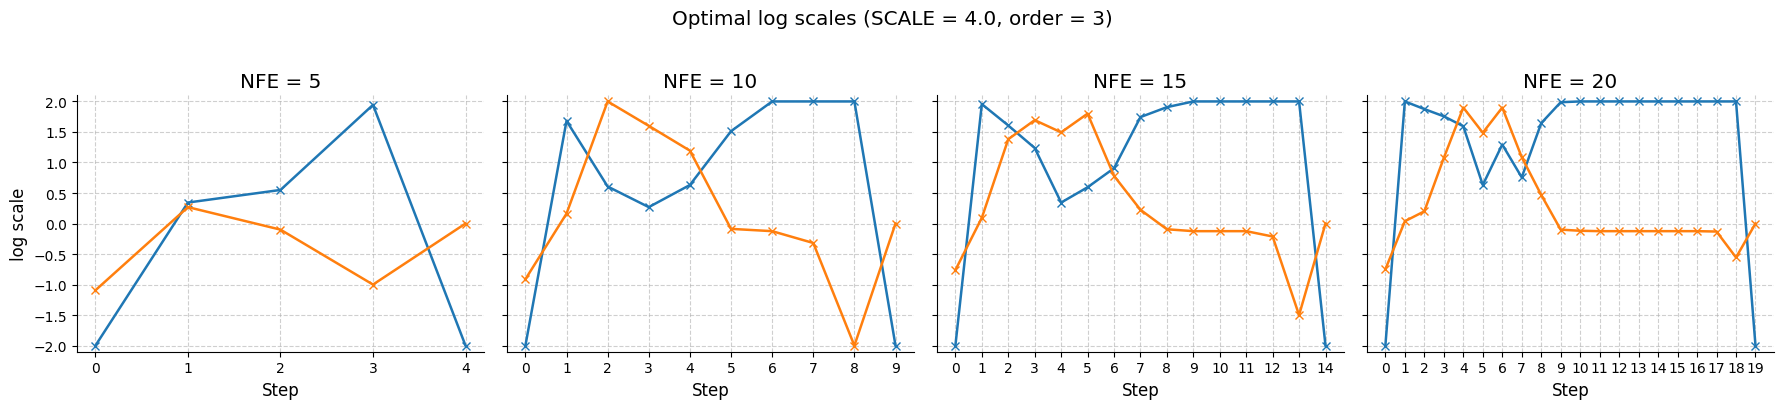

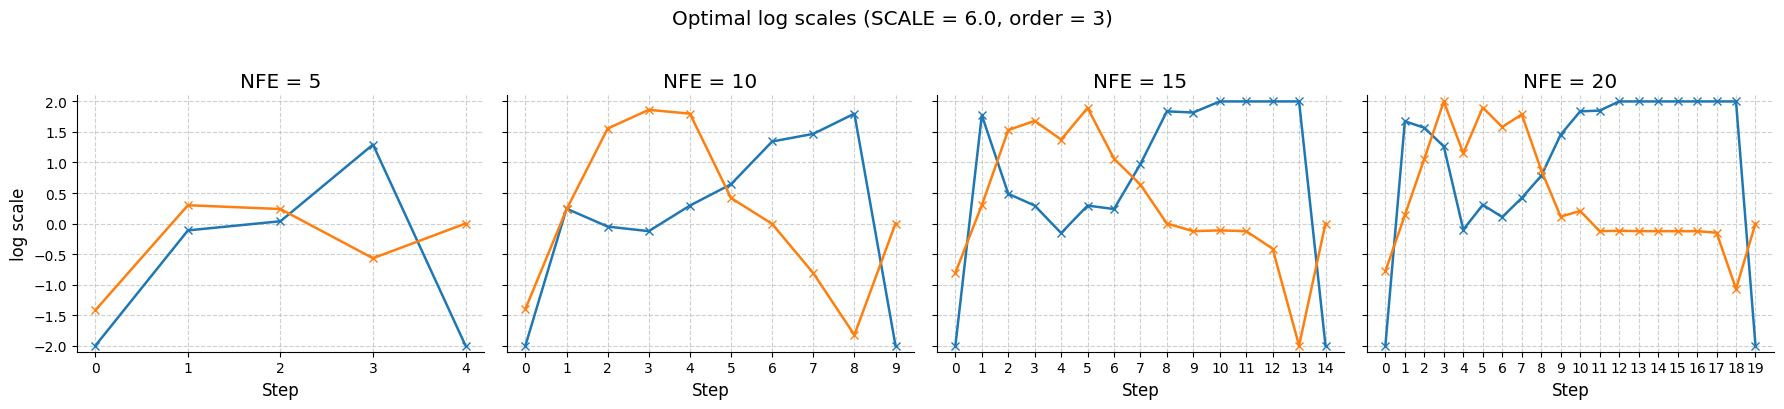

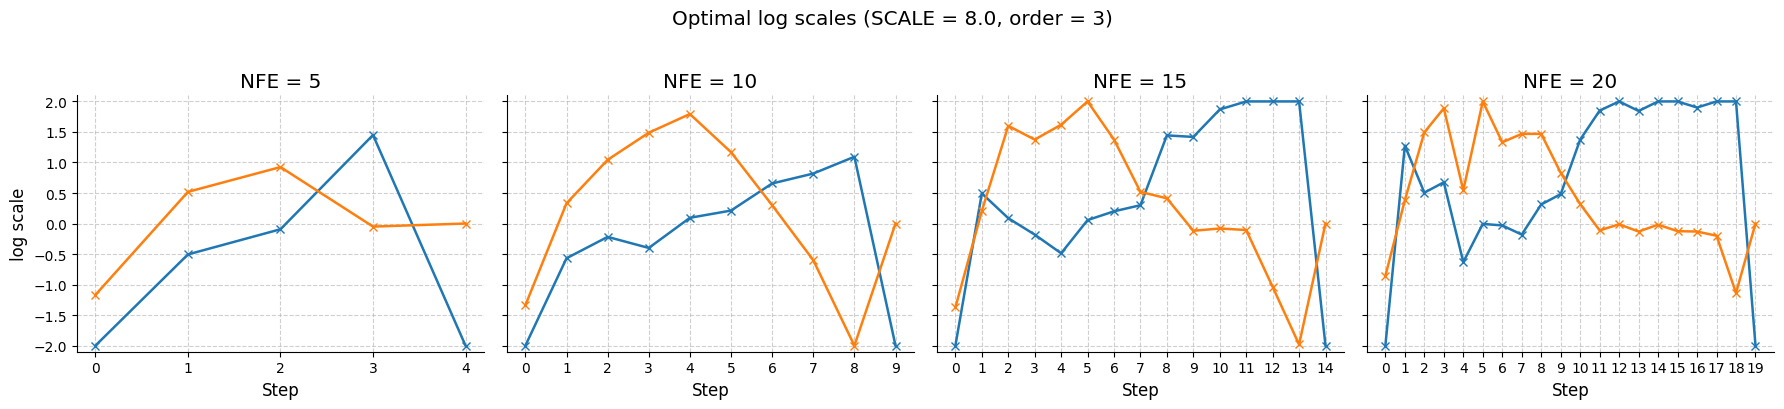

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ───────── 공통 스타일 ─────────
plt.rcParams.update({
    "font.size":        12,
    "axes.labelsize":   12,
    "xtick.labelsize":  10,
    "ytick.labelsize":  10,
    "legend.fontsize":  10,
    "axes.grid":        True,
    "grid.linestyle":   "--",
    "grid.alpha":       0.6,
    "axes.spines.top":  False,
    "axes.spines.right":False,
})

ORDER   = 3
NFE_SET = [5, 10, 15, 20]

for SCALE in [2.0, 4.0, 6.0, 8.0]:
    fig, axes = plt.subplots(1, 4, figsize=(18, 4), sharey=True)

    for ax, NFE in zip(axes, NFE_SET):
        f = f"/data/guided-diffusion/scale/rbf_ecp_marginal{SCALE}_128/NFE={NFE},p={ORDER}.npz"
        log_scales = np.load(f)["optimal_log_scales"]          # shape = (d, T)

        ax.plot(log_scales.T, lw=1.8, ls="-", marker="x")
        ax.set_title(f"NFE = {NFE}")
        ax.set_xlabel("Step")
        if ax is axes[0]:
            ax.set_ylabel("log scale")

        # ── 정수 눈금만 표시 ──
        num_steps = log_scales.shape[1]
        ax.set_xticks(np.arange(num_steps))            # 0, 1, 2, …, T-1

        ax.set_ylim(-2.1, 2.1)
        ax.grid(True)

    fig.suptitle(f"Optimal log scales (SCALE = {SCALE}, order = {ORDER})", y=1.02)
    fig.tight_layout()
    plt.show()
